In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


file_path = r"C:\Users\kalyan\Downloads\archive\imdb_top_1000.csv"
df = pd.read_csv(file_path)


columns_to_keep = ['Series_Title', 'Genre', 'IMDB_Rating', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']
df = df[columns_to_keep]


df = df.dropna()


df['Gross'] = df['Gross'].astype(str).str.replace(',', '').astype(float)


numerical_features = ['IMDB_Rating', 'Gross']  
categorical_features = ['Series_Title', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']


df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df_encoded[numerical_features])

scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features)


final_categorical_df = df_encoded.drop(numerical_features, axis=1)


processed_df = pd.concat([scaled_numerical_df, final_categorical_df], axis=1)


train_data, test_data = train_test_split(processed_df, test_size=0.2, random_state=42)


train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


print(train_data.head())


PermissionError: [Errno 13] Permission denied: 'test_data.csv'

In [ ]:

max_gross = df['Gross'].max()
df['Success_Score'] = (df['Gross'] / max_gross) * 0.5 + (df['IMDB_Rating'] / 10) * 0.5
df['Success_Score'] = df['Success_Score'] / df['Success_Score'].max()


processed_df['Success_Score'] = df['Success_Score']


X = processed_df.drop('Success_Score', axis=1)  # Features
y = processed_df['Success_Score']


train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(train_data.head())


     IMDB_Rating     Gross Series_Title_12 Angry Men  \
33      1.954075  0.586681                     False   
31      1.954075 -0.500096                     False   
817    -1.225761 -0.600678                     False   
192     0.540815 -0.452941                       NaN   
311     0.187499  1.763305                     False   

    Series_Title_12 Years a Slave Series_Title_1917  \
33                          False             False   
31                          False             False   
817                         False             False   
192                           NaN               NaN   
311                         False             False   

    Series_Title_2001: A Space Odyssey Series_Title_21 Grams  \
33                               False                 False   
31                               False                 False   
817                              False                 False   
192                                NaN                   NaN   
311         

In [ ]:

train_data_clean = train_data.dropna()


y_train_clean = y_train[train_data_clean.index]



In [20]:
print("Checking for NaN values in cleaned train_data:")
print(train_data_clean.isnull().sum())

print("Checking for NaN values in cleaned y_train:")
print(y_train_clean.isnull().sum())


Checking for NaN values in cleaned train_data:
IMDB_Rating                      0
Gross                            0
Series_Title_12 Angry Men        0
Series_Title_12 Years a Slave    0
Series_Title_1917                0
                                ..
Star4_Zach Grenier               0
Star4_Ziyi Zhang                 0
Star4_Zoe Saldana                0
Star4_Zoë Kravitz                0
Star4_Álvaro Guerrero            0
Length: 4259, dtype: int64
Checking for NaN values in cleaned y_train:
0


In [ ]:
test_data_clean = test_data.dropna()

In [ ]:
# Ensure both train_data and test_data_clean have the same columns
train_columns = train_data.columns
test_data_clean = test_data_clean[train_columns] 

In [ ]:

columns_equal = set(train_data.columns) == set(test_data_clean.columns)
print(f"Do train_data and test_data_clean have the same columns? {columns_equal}")


train_only = set(train_data.columns) - set(test_data_clean.columns)
test_only = set(test_data_clean.columns) - set(train_data.columns)

print("Columns in train_data but not in test_data_clean:", train_only)
print("Columns in test_data_clean but not in train_data:", test_only)


Do train_data and test_data_clean have the same columns? True
Columns in train_data but not in test_data_clean: set()
Columns in test_data_clean but not in train_data: set()


In [ ]:

final_df = pd.concat([train_data_clean, pd.Series(y_train_clean, name='Success_Score')], axis=1)


X = final_df.drop('Success_Score', axis=1)  
y = final_df['Success_Score'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Size of y_train: {len(y_train)}")
print(f"Size of y_test: {len(y_test)}")
print(f"Size of X_train: {len(X_train)}")
print(f"Size of X_test: {len(X_test)}")


Size of y_train: 440
Size of y_test: 111
Size of X_train: 440
Size of X_test: 111


In [25]:
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) 


RandomForestRegressor(random_state=42)

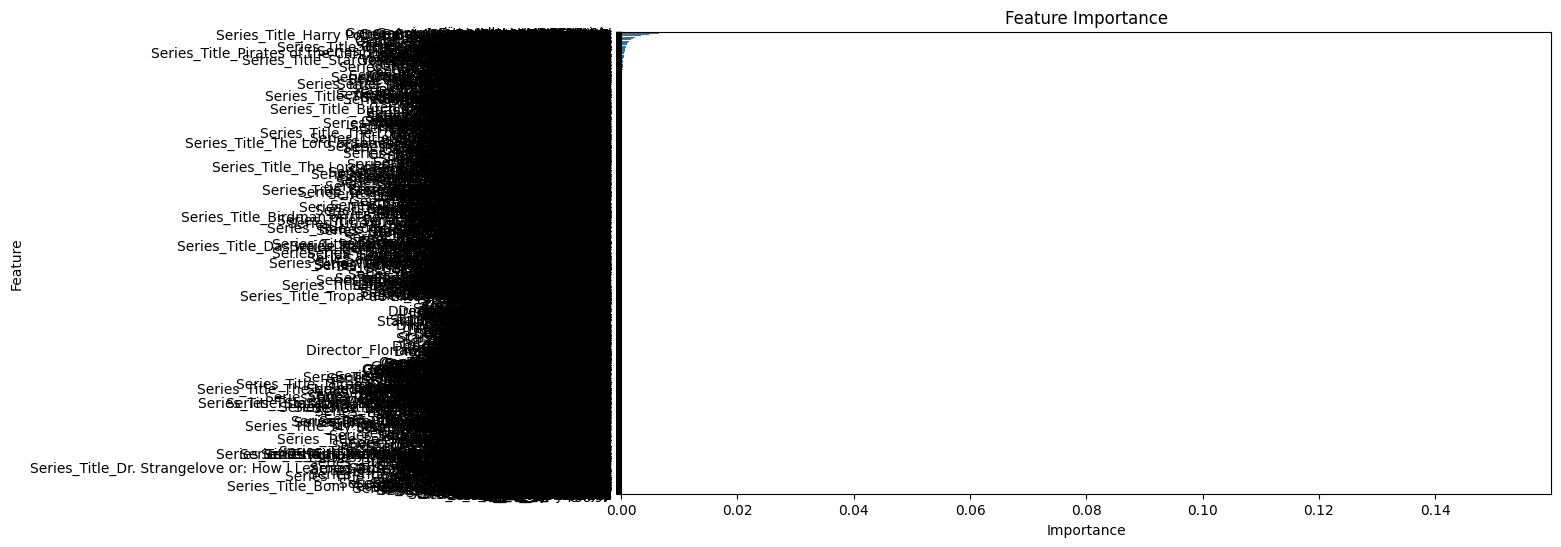

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


feature_importances = rf_model.feature_importances_  
features = X_train.columns 

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}) 
importance_df = importance_df.sort_values(by='Importance', ascending=False)  

plt.figure(figsize=(12, 6))  
sns.barplot(x='Importance', y='Feature', data=importance_df) 
plt.title('Feature Importance')  
plt.show()  

In [1]:

genre_success = df.groupby('Genre')['Success_Score'].mean().reset_index()  
genre_success = genre_success.sort_values(by='Success_Score', ascending=False)  

plt.figure(figsize=(24,12)) 
sns.barplot(x='Success_Score', y='Genre', data=genre_success) 
plt.title('Mean Success Score by Genre')
plt.show()  


NameError: name 'df' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset if you haven't done so already
# df = pd.read_csv('path_to_your_dataset.csv')  # Uncomment this if needed

# Make sure 'Genre', 'Gross', and 'IMDB_Rating' are present in your df
# Now, let's create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Genre', y='Gross', hue='IMDB_Rating', size='IMDB_Rating', sizes=(20, 200), alpha=0.6)
plt.title('Gross vs. Genre Colored by IMDB Rating')
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.xticks(rotation=45)
plt.show()


NameError: name 'df' is not defined

<Figure size 1200x600 with 0 Axes>

NameError: name 'X_train' is not defined